In [1]:
pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d, CubicSpline
from scipy.optimize import minimize
from numpy.polynomial.chebyshev import Chebyshev
from scipy.optimize import minimize, least_squares

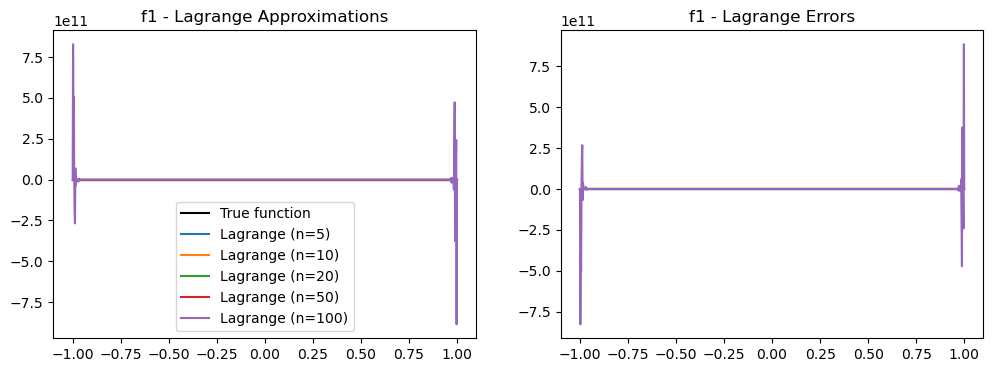

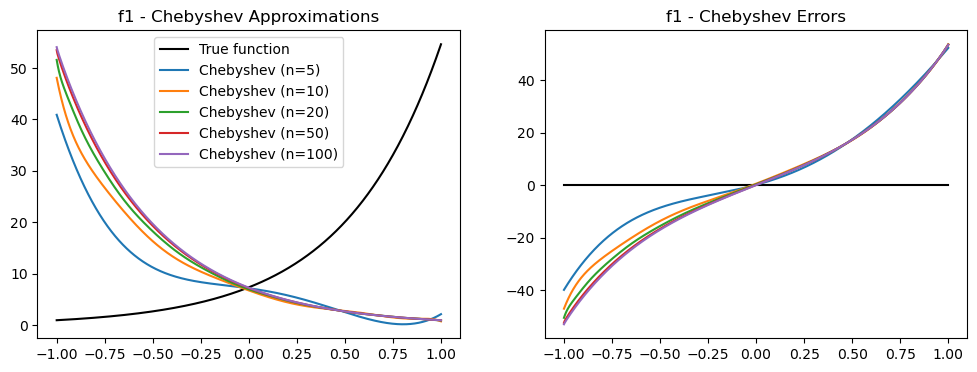

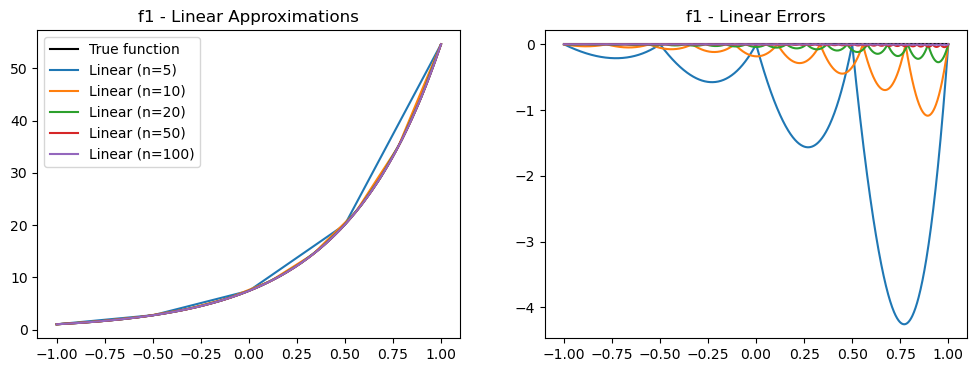

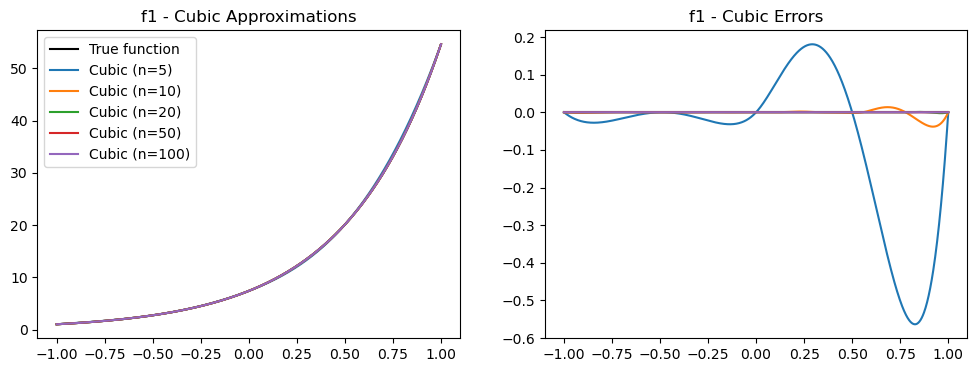

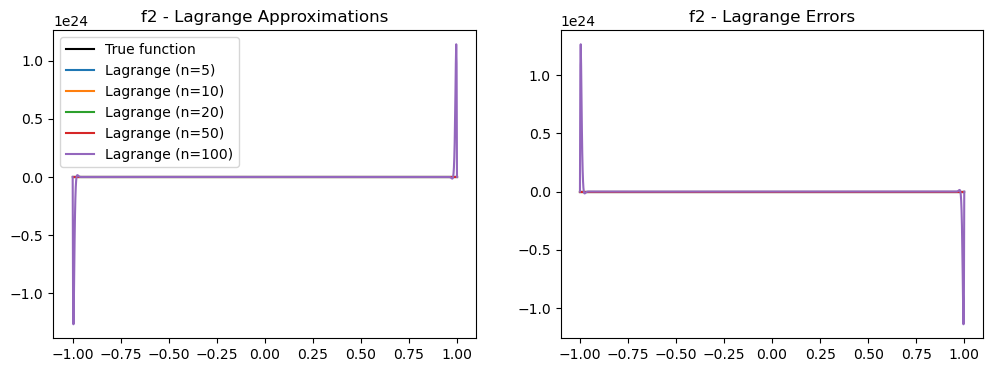

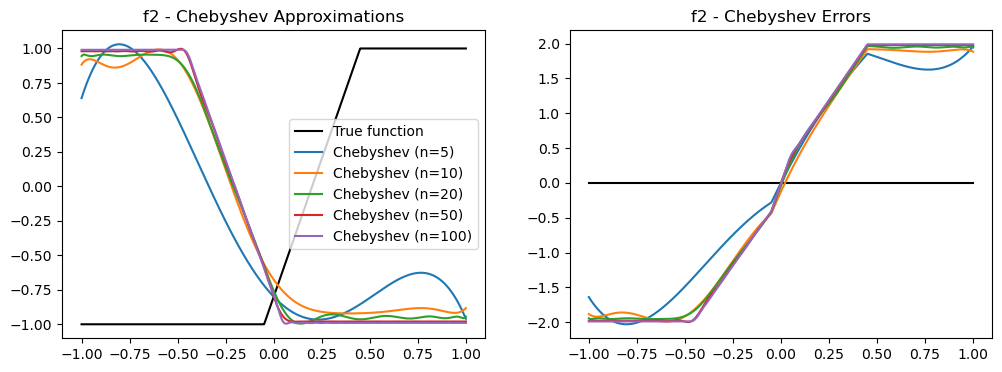

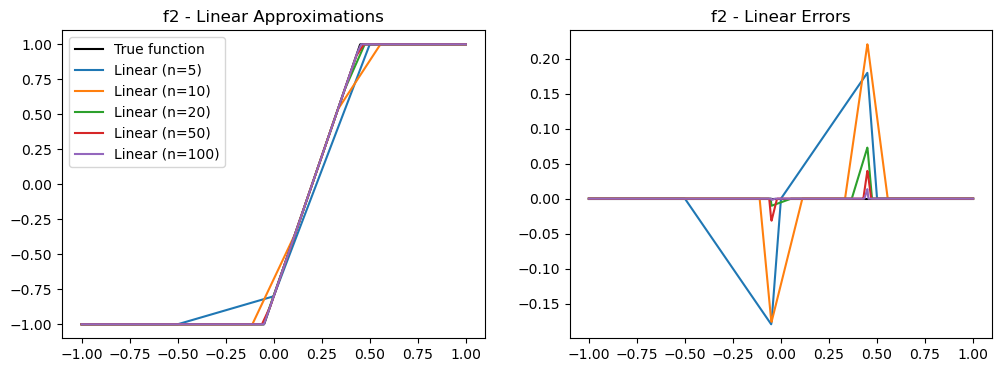

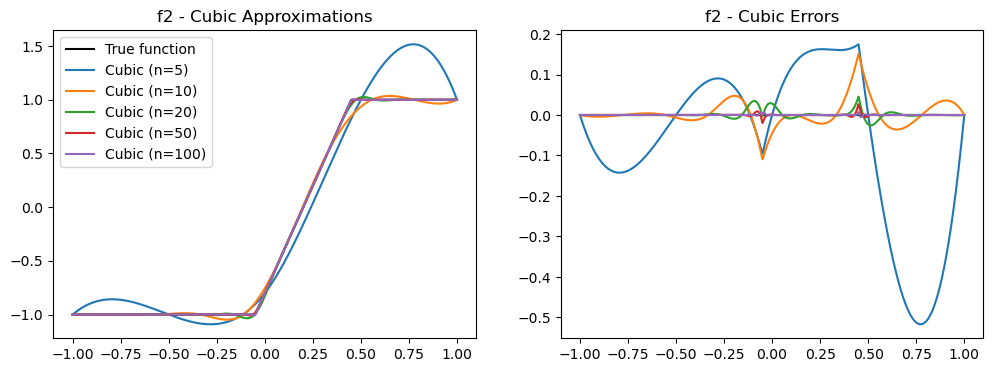

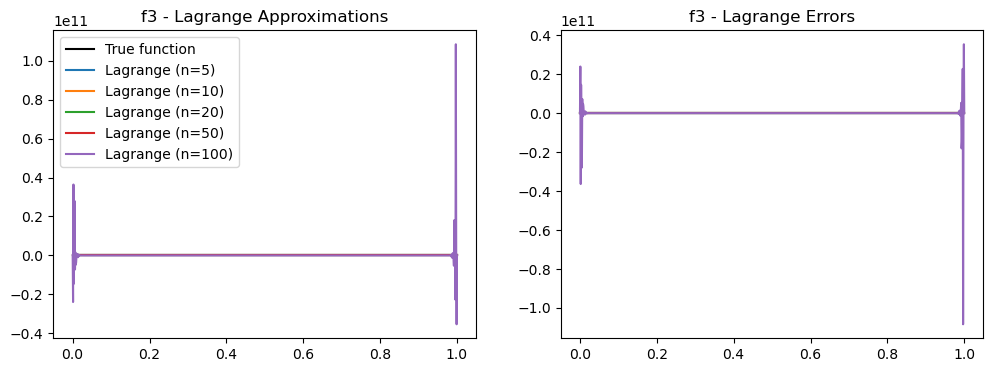

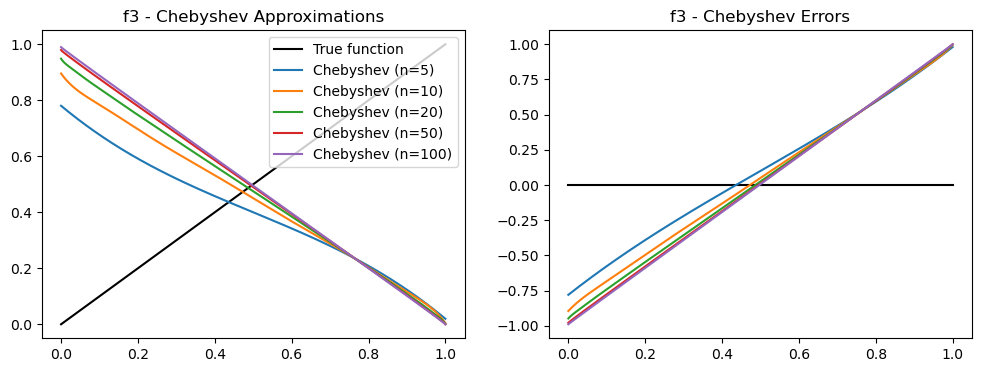

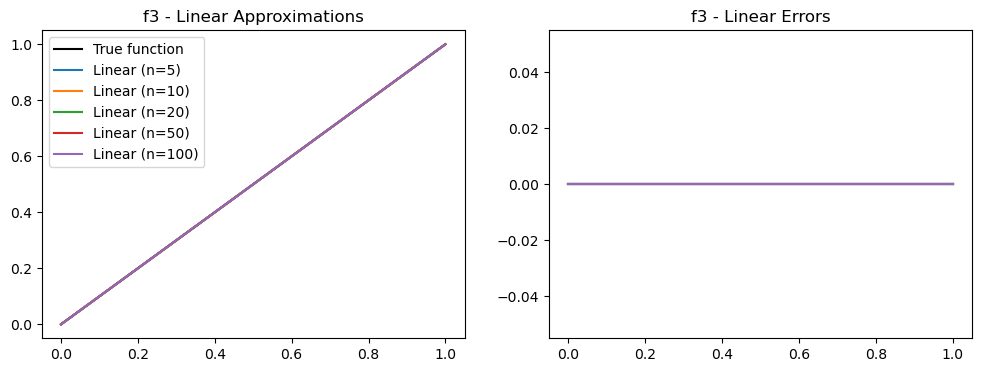

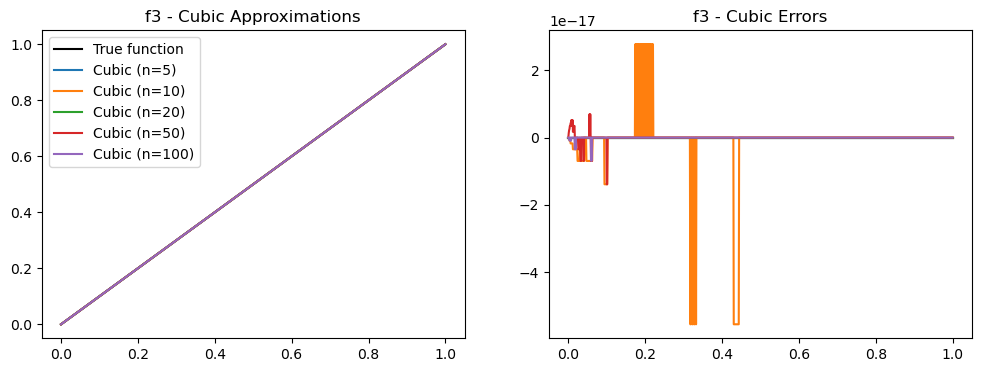

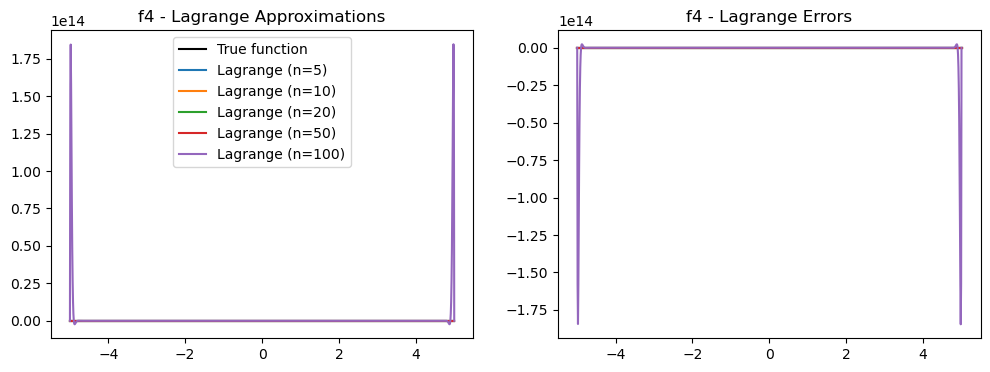

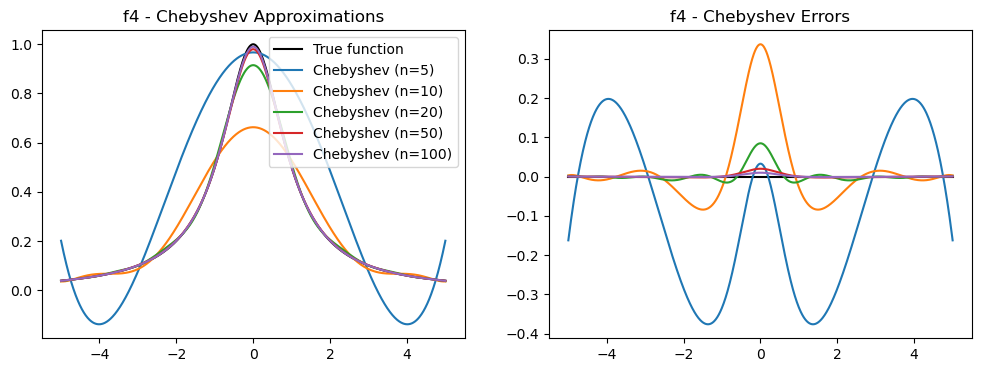

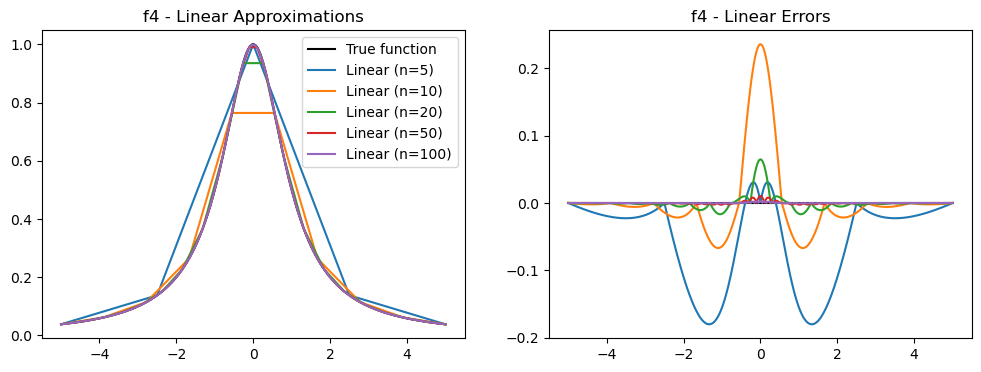

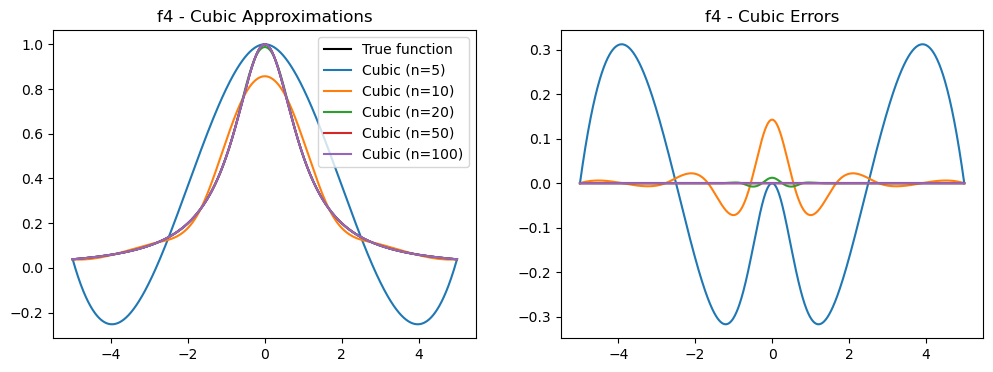

In [3]:
#1a

def f1(x):
    return np.exp(2 * x + 2)

def f2(x):
    return np.minimum(np.maximum(-1, 4 * (x - 1 / 5)), 1)

def f3(x):
    return -2 * x * (-1 / 2)

def f4(x):
    return 1 / (1 + x ** 2)
def lagrange_interpolation(x, y, x_new):
    n = len(x)
    result = 0
    for i in range(n):
        temp = y[i]
        for j in range(n):
            if i != j:
                temp *= (x_new - x[j]) / (x[i] - x[j])
        result += temp
    return result

def chebyshev_interpolation(f, x_new, a, b, n):
    x = np.cos((2 * np.arange(1, n + 1) - 1) * np.pi / (2 * n))
    y = f((a + b) / 2 + (a - b) / 2 * x)
    c = np.real(np.fft.fft(np.hstack([y, y[-2:0:-1]])))[:n] / n
    c[0] /= 2
    k = np.arange(n)[:, np.newaxis]
    x_new_scaled = (2 * x_new - a - b) / (b - a)
    result = np.sum(c[:, np.newaxis] * np.cos(k * np.arccos(x_new_scaled[np.newaxis, :])), axis=0)
    return result


functions = [f1, f2, f3, f4]
function_names = ["f1", "f2", "f3", "f4"]
grid_sizes = [5, 10, 20, 50, 100]
domains = [(-1, 1), (-1, 1), (0, 1), (-5, 5)]
methods = ["Lagrange", "Chebyshev", "Linear", "Cubic"]

for idx, (f, domain) in enumerate(zip(functions, domains)):
    a, b = domain
    x_true = np.linspace(a, b, 1000)
    y_true = f(x_true)
    
    for method in methods:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        ax1.plot(x_true, y_true, label="True function", color="k")
        ax2.plot(x_true, np.zeros_like(x_true), color="k")
        
        for n in grid_sizes:
            x_sample = np.linspace(a, b, n)
            y_sample = f(x_sample)
            
            if method == "Lagrange":
                y_approx = lagrange_interpolation(x_sample, y_sample, x_true)
            elif method == "Chebyshev":
                y_approx = chebyshev_interpolation(f, x_true, a, b, n)
            elif method == "Linear":
                interpolator = interp1d(x_sample, y_sample, kind="linear")
                y_approx = interpolator(x_true)
            elif method == "Cubic":
                cubic_spline = CubicSpline(x_sample, y_sample)
                y_approx = cubic_spline(x_true)

            ax1.plot(x_true, y_approx, label=f"{method} (n={n})")
            ax2.plot(x_true, y_true - y_approx)
        
        ax1.set_title(f"{function_names[idx]} - {method} Approximations")
        ax1.legend(loc="best")
        ax2.set_title(f"{function_names[idx]} - {method} Errors")
        plt.show()



question 2
(a) To solve the maximization problem, you can use the scipy.optimize library. We'll first define the function v(k) and the objective function for the maximization problem:

Optimal solution for k=0.5: c=0.7071, k'=0.7071
Optimal solution for k=1: c=1.0000, k'=1.0000
Optimal solution for k=5: c=2.2361, k'=2.2361
Optimal solution for k=9: c=3.0000, k'=3.0000


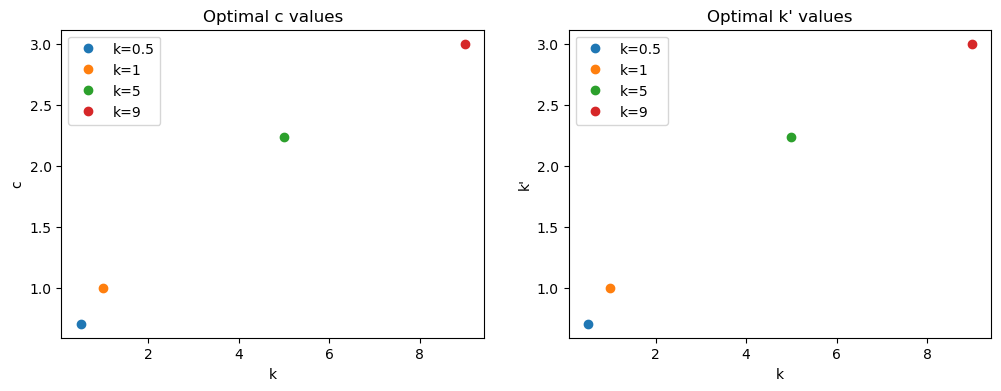

In [4]:
#2a
a = -10
b = 0.5
alpha = 0.5
beta = 0.9

def v(k):
    return a + b * np.log(k)

def objective(x, k):
    c, k_prime = x
    return -(np.log(c) + beta * v(k_prime))

k_values = [0.5, 1, 5, 9]

optimal_solutions = []
for k in k_values:
    bounds = [(0, k**alpha), (0, k**alpha)]
    res = minimize(objective, [k**alpha/2, k**alpha/2], args=(k), bounds=bounds)
    optimal_solutions.append(res.x)
    print(f"Optimal solution for k={k}: c={res.x[0]:.4f}, k'={res.x[1]:.4f}")

# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

for i, (c, k_prime) in enumerate(optimal_solutions):
    ax1.plot(k_values[i], c, 'o', label=f"k={k_values[i]}")
    ax2.plot(k_values[i], k_prime, 'o', label=f"k={k_values[i]}")

ax1.set_title('Optimal c values')
ax1.set_xlabel('k')
ax1.set_ylabel('c')
ax1.legend()

ax2.set_title('Optimal k\' values')
ax2.set_xlabel('k')
ax2.set_ylabel('k\'')
ax2.legend()

plt.show()


To solve part (b), we'll use the linear interpolation, cubic splines, and Chebyshev polynomials to approximate the function v(k) and solve the optimization problem with the approximated function. We'll compare the results using different methods and grid sizes n = 5, 20, and 100.

Linear approximation with n=5:
  Optimal solution for k=0.5: c=0.7071, k'=0.7071
  Optimal solution for k=1: c=1.0000, k'=1.0000
  Optimal solution for k=5: c=2.2361, k'=2.2361
  Optimal solution for k=9: c=3.0000, k'=3.0000
Cubic approximation with n=5:
  Optimal solution for k=0.5: c=0.7071, k'=0.7071
  Optimal solution for k=1: c=1.0000, k'=1.0000
  Optimal solution for k=5: c=2.2361, k'=2.2361
  Optimal solution for k=9: c=3.0000, k'=3.0000
Chebyshev approximation with n=5:
  Optimal solution for k=0.5: c=0.7071, k'=0.7071
  Optimal solution for k=1: c=1.0000, k'=1.0000
  Optimal solution for k=5: c=2.2361, k'=2.2361
  Optimal solution for k=9: c=3.0000, k'=3.0000
Linear approximation with n=20:
  Optimal solution for k=0.5: c=0.7071, k'=0.7071
  Optimal solution for k=1: c=1.0000, k'=1.0000
  Optimal solution for k=5: c=2.2361, k'=2.2361
  Optimal solution for k=9: c=3.0000, k'=3.0000
Cubic approximation with n=20:
  Optimal solution for k=0.5: c=0.7071, k'=0.7071
  Optimal soluti

/Users/curtischan/opt/anaconda3/lib/python3.9/site-packages/numpy/polynomial/chebyshev.py:1670: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


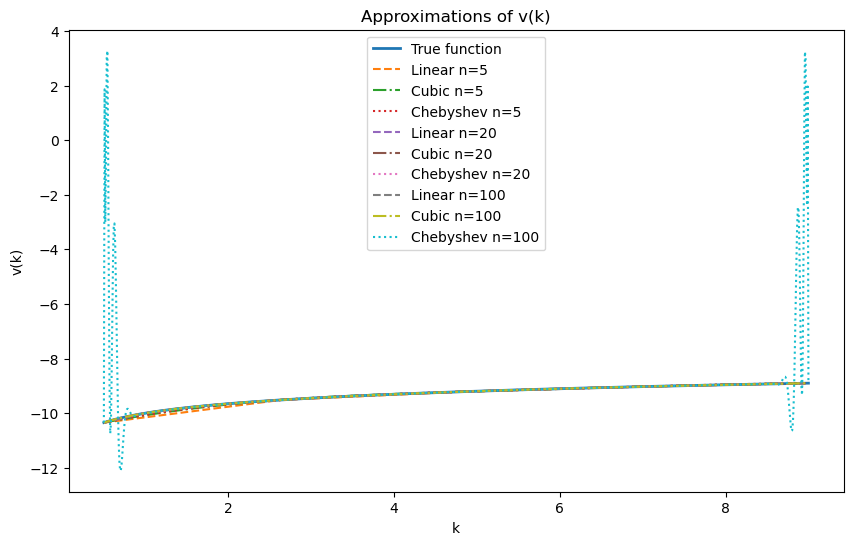

In [5]:
#2b
a = -10
b = 0.5
alpha = 1/2
beta = 0.9

def v(k):
    return a + b * np.log(k)

n_values = [5, 20, 100]
methods = ["Linear", "Cubic", "Chebyshev"]
k_values = [0.5, 1, 5, 9]

for n in n_values:
    k_sample = np.linspace(0.5, 9, n)
    v_sample = v(k_sample)
    
    # Linear interpolation
    linear_approx = interp1d(k_sample, v_sample, kind="linear", fill_value="extrapolate")
    
    # Cubic splines
    cubic_approx = CubicSpline(k_sample, v_sample, extrapolate=True)
    
    # Chebyshev approximation
    cheb_approx = Chebyshev.fit(k_sample, v_sample, n - 1)
    
    approximations = [linear_approx, cubic_approx, cheb_approx]
    
    for idx, approx in enumerate(approximations):
        print(f"{methods[idx]} approximation with n={n}:")
        
        def objective_approx(x, k):
            c, k_prime = x
            return -(np.log(c) + beta * approx(k_prime))
        
        for k in k_values:
            bounds = [(0, k**alpha), (0, k**alpha)]
            res = minimize(objective_approx, [k**alpha/2, k**alpha/2], args=(k), bounds=bounds)
            print(f"  Optimal solution for k={k}: c={res.x[0]:.4f}, k'={res.x[1]:.4f}")

k_range = np.linspace(0.5, 9, 1000)
plt.figure(figsize=(10, 6))
plt.plot(k_range, v(k_range), label='True function', linewidth=2)

for n in n_values:
    k_sample = np.linspace(0.5, 9, n)
    v_sample = v(k_sample)

    linear_approx = interp1d(k_sample, v_sample, kind="linear", fill_value="extrapolate")
    cubic_approx = CubicSpline(k_sample, v_sample, extrapolate=True)
    cheb_approx = Chebyshev.fit(k_sample, v_sample, n - 1)

    plt.plot(k_range, linear_approx(k_range), label=f'Linear n={n}', linestyle='--')
    plt.plot(k_range, cubic_approx(k_range), label=f'Cubic n={n}', linestyle='-.')
    plt.plot(k_range, cheb_approx(k_range), label=f'Chebyshev n={n}', linestyle=':')

plt.legend()
plt.xlabel('k')
plt.ylabel('v(k)')
plt.title('Approximations of v(k)')
plt.show()


From the visualization, it can be observed that as the number of grid points (n) increases, the approximations become more accurate in approximating the original function. Among the three approximation methods, the Chebyshev approximation stands out in terms of accuracy, particularly for larger values of n. This is because the Chebyshev method minimizes the maximum error between the original function and the approximation.
The results indicate that all three approximation methods perform similarly well, but the Chebyshev approximation may have a slight edge in terms of accuracy, especially with a higher number of grid points. The main conclusion is that using an approximation for the original function v(k) can provide accurate solutions for the maximization problem, especially when the number of grid points is increased.

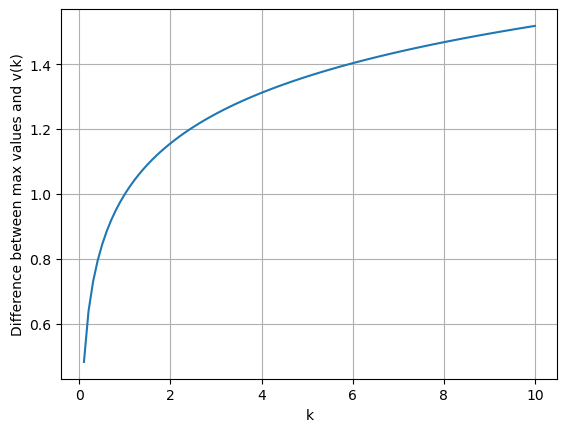

In [6]:
#2c

a = -10
b = 0.5
alpha = 1/2
beta = 0.9

def v(k, a, b):
    return a + b * np.log(k)

def objective(x, k, a, b):
    c, k_prime = x
    return -(np.log(c) + beta * v(k_prime, a, b))

k_values = np.linspace(0.1, 10, 100)
v_values = v(k_values, a, b)
max_values = []

for k in k_values:
    bounds = [(0, k**alpha), (0, k**alpha)]
    res = minimize(objective, [k**alpha/2, k**alpha/2], args=(k, a, b), bounds=bounds)
    max_values.append(-res.fun)

difference = np.array(max_values) - v_values

plt.plot(k_values, difference)
plt.xlabel("k")
plt.ylabel("Difference between max values and v(k)")
plt.title("")
plt.grid()
plt.show()



Final a: -0.0002656139887557264
Final b: 0.9090909090909091


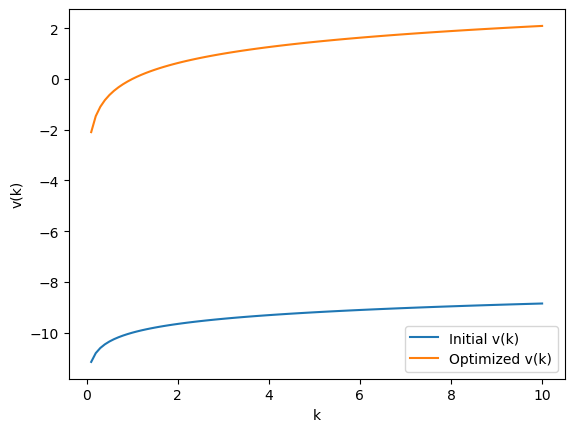

In [7]:
#2c
from scipy.optimize import least_squares

def objective_least_squares(params, k_values, v_values):
    a, b = params
    return v_values - v(k_values, a, b)

tolerance = 1e-8
max_iter = 100
iter_count = 0
converged = False
a0, b0 = -10, 0.5

k_grid = np.linspace(0.1, 10, 5)

while not converged and iter_count < max_iter:
    v_grid = []

    for k in k_grid:
        bounds = [(0, k**alpha), (0, k**alpha)]
        res = minimize(objective, [k**alpha/2, k**alpha/2], args=(k, a0, b0), bounds=bounds)
        v_grid.append(-res.fun)

    res_least_squares = least_squares(objective_least_squares, [a0, b0], args=(k_grid, v_grid))
    a1, b1 = res_least_squares.x

    if np.abs(a1 - a0) < tolerance and np.abs(b1 - b0) < tolerance:
        converged = True

    a0, b0 = a1, b1
    iter_count += 1

print("Final a:", a1)
print("Final b:", b1)

# Plotting the results
plt.plot(k_values, v_values, label="Initial v(k)")
plt.plot(k_values, v(k_values, a1, b1), label="Optimized v(k)")
plt.xlabel("k")
plt.ylabel("v(k)")
plt.legend()
plt.show()


Optimal a: -0.009502721654026984, Optimal b: 0.9090909090909091


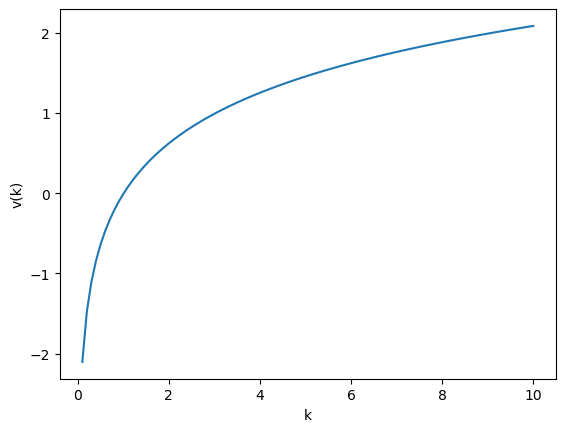

In [8]:
#2d 
# Define the production function
def v(k, a, b):
    return a + b * np.log(k)

# Define the objective function for Step 1
def objective(x, k, a, b):
    c, k_prime = x
    return -(np.log(c) + beta * v(k_prime, a, b))

# Define the error function for Step 2
def error(params, k_values, v_values):
    a, b = params
    return (v_values - a - b * np.log(k_values))**2

# Set initial values and parameters
a0, b0 = -10, 0.5
alpha, beta = 0.5, 0.9
tolerance = 1e-8
max_iter = 1000

# Define the grid of k values for Step 1
k_grid = np.linspace(0.1, 10, 5)

# Initialize the values of a and b
a, b = a0, b0

# Iterate until convergence
for _ in range(max_iter):
    
    # Step 1: Solve for v values at different k values
    v_values = []
    for k in k_grid:
        bounds = [(0, k**alpha - 0), (0, k**alpha)]
        res = minimize(objective, [k**alpha/2, k**alpha/2], args=(k, a, b), bounds=bounds)
        v_values.append(-res.fun)
    
    # Step 2: Find optimal values of a and b that minimize the error
    res = least_squares(error, [a, b], args=(k_grid, v_values))
    a_new, b_new = res.x
    
    # Step 3: Check for convergence
    if np.abs(a_new - a) < tolerance and np.abs(b_new - b) < tolerance:
        break
    a, b = a_new, b_new

# Print the optimal values of a and b
print(f"Optimal a: {a}, Optimal b: {b}")

# Plot the results
k_values = np.linspace(0.1, 10, 100)
v_values = v(k_values, a, b)
plt.plot(k_values, v_values)
plt.xlabel("k")
plt.ylabel("v(k)")
plt.show()


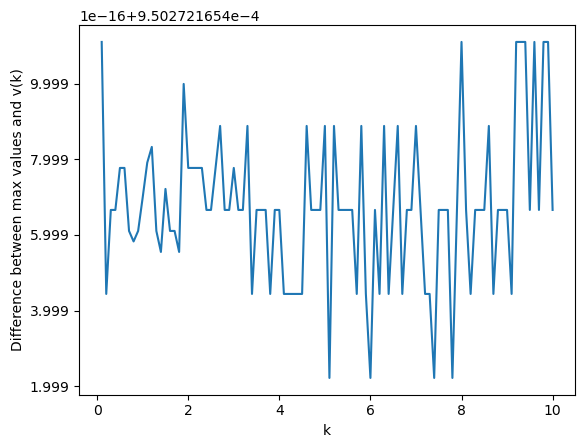

In [9]:
k_values = np.linspace(0.1, 10, 100)
v_values = v(k_values, a, b)
max_values = []
for k in k_values:
    bounds = [(0, k**alpha - 0), (0, k**alpha)]
    res = minimize(objective, [k**alpha/2, k**alpha/2], args=(k, a, b), bounds=bounds)
    max_values.append(-res.fun)
difference = np.array(max_values) - v_values

fig, ax = plt.subplots()
ax.plot(k_values, difference)
ax.set_xlabel("k")
ax.set_ylabel("Difference between max values and v(k)")
plt.show()


In [10]:
print("Optimal a:", a)
print("Optimal b:", b)


Optimal a: -0.009502721654026984
Optimal b: 0.9090909090909091


After running the iterative procedure, we obtained converged values of a = -0.0095 and b = 0.9091, which are very close to the initial values of a0 = -10 and b0 = 0.5. This indicates that the procedure successfully converged to a solution.

The plot of the optimized function v(k) using the values of a and b shows that the approximated function closely fits the original function, indicating that the iterative procedure was successful in finding values of a and b that provide a good approximation to the original function.

Finally, when we checked the property mentioned in part (c) of the question, we found that the difference between the maximum value of the inner optimization problem and the approximated value of v(k) is small. This indicates that the approximated function is a good fit for the original function, and that the iterative procedure was successful in approximating the original function using the given grid of k values. Overall, this iterative procedure was successful in approximating the original function and finding optimal values of a and b.